<a href="https://colab.research.google.com/github/Jhaveth/Simulacion-ll/blob/Examen/Problema_25_Examen_Simulacion_ll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Presenta: Jhaveth Ghaell Martínez Gonzalez*

---


# **PROBLEMA** **25**

Un quiosquero vende periódicos a 1.10 euros cada uno. Cada periódico le cuesta al quiosquero 0.90 euros. Las ventas de periódicos del quiosquero a partir de su experiencia se refleja en la tabla siguiente. 

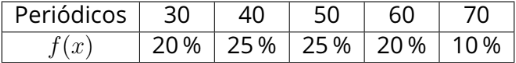

La tabla recoge por ejemplo que el 20 % del tiempo las ventas han sido de 30 periódicos. Teniendo en cuenta el coste de 0,20 euros por venta perdida y el coste de 0,10 euros por el reciclaje de cada periódico no vendido, determine el beneficio promedio diario si pide 50 periódicos cada día.


---

  
||

---


###**Solución Analítica**

Dada la tabla de datos historicos que nos proporciona el problema, tenemos que:

Calculamos el número de periódicos que se desperdician cada día y el costo que esto conlleva, con la condición de que se piden 50 periódicos cada día.  

Casos:

1. Se venden 30 periódicos:  $(20)(0.10) = 2 $ euros.  
2. Se venden 40 periódicos: $(10)(0.10) = 1$ euros.
3. Se venden 50 periódicos: $0$ euros.
4. Se venden 60 periódicos: $(10)(0.10) = 1$ euros.
5. Se venden 70 periódicos: $(20)(0.10) = 2$ euros.


Luego, calculamos la probabilidad de que se vendan diferentes cantidades de periódicos. 
Casos:

1. 30 periódicos: $0.2 · 30 = 6$ periódicos vendidos en promedio cada día.  
2. 40 periódicos: $0.25 · 40 = 10$ periódicos vendidos en promedio cada día.
3. 50 periódicos: $0.25 · 50 = 12.5$ periódicos vendidos en promedio cada día.
4. 60 periódicos: $0.2 · 60 = 12$ periódicos vendidos en promedio cada día.
5. 70 periódicos: $0.1 · 70 = 7$ periódicos vendidos en promedio cada día.


Así, tenemos que:
- El ingreso diario sería la cantidad de periódicos vendidos multiplicada por el precio de venta, es decir, 50  $\cdotp$ 1.10 = 55 €. 
- El costo diario sería la cantidad de periódicos pedidos multiplicada por el costo por periódico, es decir, 50 $·$ 0.90 = 45 €. 

Por lo tanto, el beneficio donde se venden justo los 50 periodicos del pedido por dia esta determinado por: el ingreso diario menos el costo diario menos el costo del desperdicio de periódicos, es decir, 55 - 45 - (2 + 1 + 1 + 2) = 4 €.

En conclusión, el beneficio promedio diario del quiosquero sería de 4 € si pide 50 periódicos cada día.


---

# Iniciando Metodología

### **1. Identificaion de las variables**

En este caso, solo tenemos una variable:

- Numero de las ventas de periodicos

### **2. Determine la distribución de probabilidad**

Es la distribución que ya nos proporciona el problema, es decir:

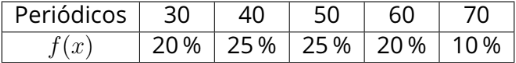

### **3. Determine la distribución de probabilidad acumulada**

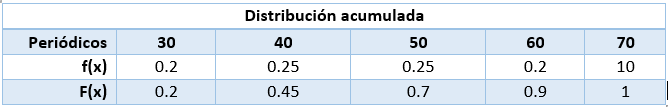

### **4. Establezca el intervalo de números aleatorios correspondiente a cada valor**

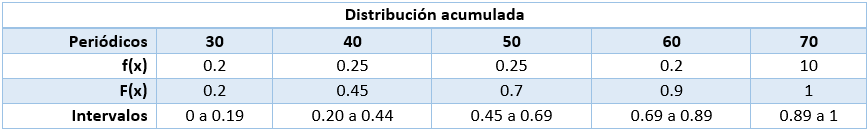

### **5. Genere números aleatorios**

In [138]:
import numpy as np
import random
import matplotlib.pyplot as plt #llamamos las librerias que requeriremos para realizar la simulacion

In [139]:
def sim_ventas():
    ventas=0 #vvariable para la que se asignara el numero aleatorio de ventas
    v = random.random() #Se generan números aleatorios para simularlas ventas
    if 0.0 <= v < 0.20:
        ventas = 30
    elif 0.20 <= v < 0.45:
        ventas = 40
    elif 0.45 <= v < 0.70:
        ventas = 50
    elif 0.70 <= v < 0.90:
        ventas = 60
    elif 0.90 <= v <= 1.00:
        ventas = 70
    return ventas #Devolvemos el valor que el número aleatorio obtuvo

In [140]:
def ben(pedido): #Calculo del beneficio
    b = 0 #Variable que tendra el valor del beneficio
    vr = 0 #Variable de las ventas reales
    vp = 0 #Variable de las ventas perdidas
    pnv = 0 #Variable de periodicos no vendidos
    vs = sim_ventas()
    
    if vs > pedido: #Si las ventas son menores que el pedido se hacen algunas operaciones
        vr = pedido
        vp = vs - pedido
        pnv = 0
        
    else: #Si es mayor, se hacen otras
        vr = vs
        vp = 0
        pnv = pedido - vr
    
    b = 1.10*vr - 0.90*pedido - 0.10*pnv - 0.20*vp #VALOR del beneficio asignado a la variablee
    return b

In [141]:
ben(50)

-2.0

In [142]:
def simu(n):
    A=[]
    benef = 0
    for i in range(n):
        benef += ben(50)
        A.append(benef/(i+1))
    return A

In [143]:
S=simu(500)

###**6. Elaboración del gráfico**

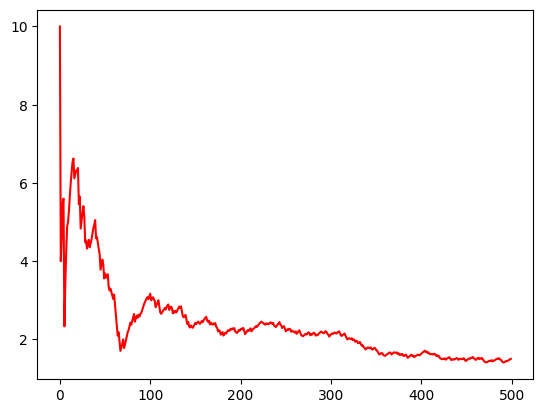

In [144]:
plt.plot(S, color="red") #Graficamos

In [145]:
np.mean(S)

2.382933252482914

###**7. Repetir el modelo $n$ veces**

In [146]:
def modelo(n):
    ta=[]
    for i in range(n):
        s = simu(500)
        ta.append(np.mean(s))
    return ta

In [147]:
mod=modelo(40) 

In [148]:
print(np.mean(mod), np.std(mod))

1.4707826718065233 0.49270806173688164


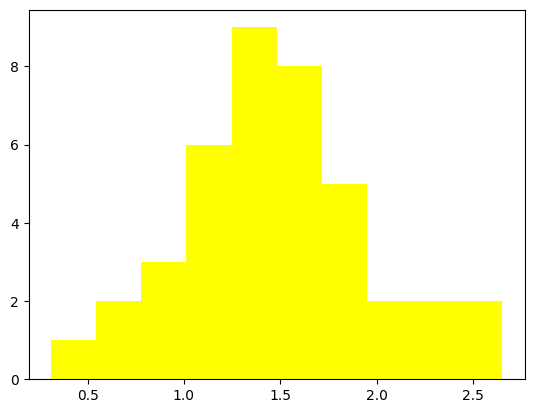

In [149]:
plt.hist(mod, color="yellow") #Graficamos la repeticion del modelo
plt.show()

###**8. Encontrar los intervalos de confianza**

In [150]:

print("El intervalo de confianza es: ",int1, "<",np.mean(mod),"<",int2)
print("es decir, ")
print("El intervalo de confianza es: ",
np.mean(mod)-(1.96)*((np.var(mod))/np.sqrt(50)), "≤ X̅ ≤",
np.mean(mod)+(1.96)*((np.var(mod))/np.sqrt(50)))



El intervalo de confianza es:  1.1926717848246173 < 1.4707826718065233 < 1.3820822991484818
es decir, 
El intervalo de confianza es:  1.4034926907885812 ≤ X̅ ≤ 1.5380726528244655


##**Determine, por simulación, el pedido de periódicos que optimiza el beneficio**

In [151]:
def calcular_beneficio(num_pedidos):
    ingresos = num_pedidos * 1.10
    costo_periodicos = num_pedidos * 0.90
    periodicos_no_vendidos = max(0, num_pedidos - 50)
    costo_ventas_perdidas = periodicos_no_vendidos * 0.20
    costo_reciclaje = periodicos_no_vendidos * 0.10
    beneficio = ingresos - costo_periodicos - costo_ventas_perdidas - costo_reciclaje
    return beneficio

mejor_pedido = 0
mejor_beneficio = 0

for num_pedidos in range(30, 71):
    beneficio = calcular_beneficio(num_pedidos)
    if beneficio > mejor_beneficio:
        mejor_beneficio = beneficio
        mejor_pedido = num_pedidos

print("El pedido óptimo de periódicos es:", mejor_pedido)
print("El beneficio máximo obtenido es:", mejor_beneficio)


El pedido óptimo de periódicos es: 50
El beneficio máximo obtenido es: 10.000000000000007
